# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


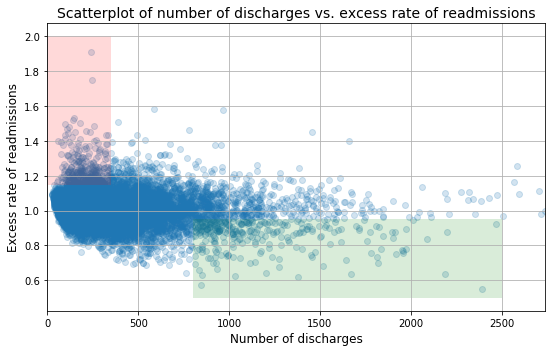

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

Evaluating the Prelimary

In [6]:
print(clean_hospital_read_df['Start Date'].unique(), clean_hospital_read_df['End Date'].unique())

['07/01/2010'] ['06/30/2013']


<H3>A. Do you agree with the above analysis and recommendations? Why or why not?<H3>
    
<H4>Initial Observations</H4>
<LI>The preliminary observations mention that overall the rate of readmissions is trending down. This is not possible to evaluate using the data set given the dataset has only one period's data: 07/01/2010-06/30/2013. Therefore trends can not be observed.</LI>
<LI>Additionally the areas that are highlighted do show greater number of readmissions, but there are also a greater number of datapoints in the number of discharges compared to the higher amount of discharges. Similarly, the green area has overall less data points with high excess rates of readmission, it also has less hospitals reporting that number of discharges. Overall the scatterplot is going straight across, indicating that there doesn't seem to be any significant relation between the two variables.</LI>


<H4>Statistics</H4>
<LI>The statistics are discussing means, but don't mention the possible error or variance in those areas. The means might be more of a result of outliers or may not have statistical significance.
<LI>The area highlighted on the graph is showing an area of up to 350 and then after 800. So it it's skipping a large amount of the population. And the analysis references up to 100 and after 1000, which makes it hard to relate the conclusions and the associated support.
<LI>The graph does not distinguish between the different types of diagnoses and whether certain hospitals are doing better with specific diagnoses or just as a hospital.
    
<H4>Conclusions</H4>
<LI>The preliminary report is indicating that there is significant correlation between hospital capacity and readmission rates. There are two problems with that. First, it is saying that hospital capacity is equal to the number of discharges, while the rate of turnover in a hospital might just be high for a small hospital compared to a larger hospital with a lower turnover. Second, a significant amount of correlation would mean that the scatterplot would show excess rate of readmission decreasing more significantly rather than staying close to a rate of 1 as the number of discharges increase. Finally, while it looks at a mean of &lt; 100, I don't know how it jumps to a recommendation for hospitals with discharges less than 300.
    
So overall, the logic is flawed in the analysis above and I disagree with the analysis and conclusions.

<H3>B. Provide support for your arguments and your own recommendations with a statistically sound analysis:</H3>

Let's see if there is a statistically significant difference in the means between the two populations.


<B>Null hypothesis: Hospitals/facilities with number of discharges &lt; 100 mean excess readmission rate is equal to the mean excess readmission rate of hospitals/facilities with number of discharges &gt; 1000.</B>

<B>Alternate hypothesis: Hospitals/facilities with number of discharges &lt; 100 mean excess readmission rate is <U>NOT</U> equal to the mean excess readmission rate of hospitals/facilities with number of discharges &gt; 1000.</B>

<B>Alpha == 0.01</B>

In [7]:
clean_hospital_read_df[clean_hospital_read_df['Hospital Name'] == 'LEE MEMORIAL HOSPITAL']

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
2128,LEE MEMORIAL HOSPITAL,100012,FL,READM-30-AMI-HRRP,629,NaN,1.0822,17.5,16.1,114.0,07/01/2010,06/30/2013
6333,LEE MEMORIAL HOSPITAL,100012,FL,READM-30-PN-HRRP,1045,NaN,1.0050,16.8,16.7,176.0,07/01/2010,06/30/2013
4983,LEE MEMORIAL HOSPITAL,100012,FL,READM-30-COPD-HRRP,1287,NaN,1.0248,20.1,19.6,260.0,07/01/2010,06/30/2013
4409,LEE MEMORIAL HOSPITAL,100012,FL,READM-30-HF-HRRP,1411,NaN,1.0344,22.3,21.5,316.0,07/01/2010,06/30/2013
2758,LEE MEMORIAL HOSPITAL,100012,FL,READM-30-HIP-KNEE-HRRP,2198,NaN,1.0663,5.5,5.2,122.0,07/01/2010,06/30/2013


In [8]:
above1000_hospital_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Number of Discharges']
below100_hospital_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Number of Discharges']
t, prob = stats.ttest_ind(above1000_hospital_df, below100_hospital_df, equal_var=False)
print('Above 1000 Number of discharges mean: ', above1000_hospital_df.mean())
print('Below 100 Number of discharges mean: ', below100_hospital_df.mean())
print('T-test statistic:', t)
print('Probability:', prob)

Above 1000 Number of discharges mean:  1383.427645788337
Below 100 Number of discharges mean:  69.94799054373523
T-test statistic: 61.52779960637751
Probability: 5.573561801288162e-225


<B>Based on the alpha (level of significance), it seems that there is a statistical difference between the two populations.</B>

The probability that is given by the two tailed t test shows that the difference in means is quite different, and that it is unlikely that the two populations would have the same mean excess readmission ratio. 
From a practical standpoint, it makes us assume that larger hospitals have more resources and controls to ensure that readmissions do not occur as frequently as they do for smaller hospitals. This leads to effectively the same conclusions as shown above.

The recommendations to be applied to hospitals with number of discharges less than 300 should be amended to 100, and a deeper look at other factors influencing readmission rate should be taken.

In [9]:
filt_hospital_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0]

<B>Looking At the Graphical Data</B>

The original scatterplot is useful in showing the relationship between the two variables (number of discharges, excess readmission ratio). 
The problem in the scatterplot is the density of the data. It makes it hard to distinguish the relationship as easily since the excess readmission ration is centered around 1. To make the it easier to see the spread or variance of the information, the excess readmission rate has been temporarily raised to the power of 100, significantly spreading the data points out based on on how high the original excess readmission rate was.

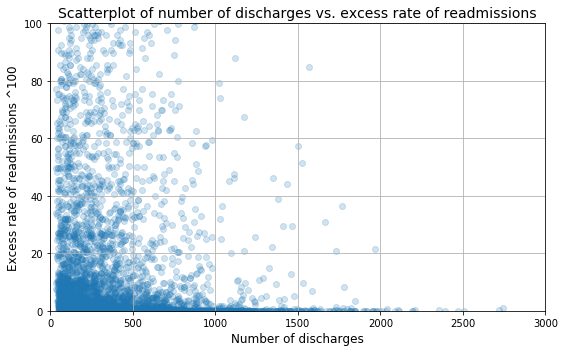

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = filt_hospital_df['Number of Discharges']
y = filt_hospital_df['Excess Readmission Ratio'].pow(100)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, 3000])
ax.set_ylim([min(y), pow(10, 2)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions ^100', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

This shows that there is a wealth of information on the hospitals with a lower number of readmissions and significantly larger number of data points and much less on the higher end.
To make this easier to see, the mean of Excess rate of readmission per number of discharges is taken below.

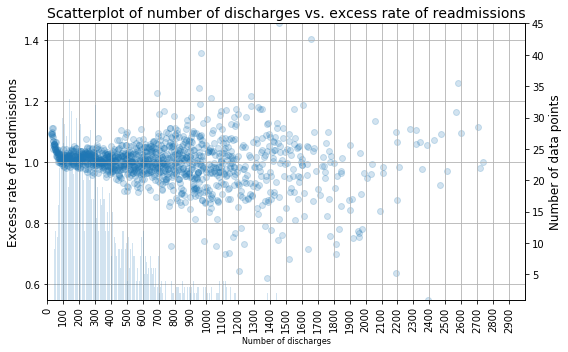

In [11]:
# Create mean and count versions of the data, grouped by the Number of Discharges.
mean_hospital_df = filt_hospital_df.groupby(['Number of Discharges'])['Excess Readmission Ratio'].mean()
count_hospital_df = filt_hospital_df.groupby(['Number of Discharges'])['Excess Readmission Ratio'].count()
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

# Plot the mean excess rate of readmissions.
x = mean_hospital_df.index
y = mean_hospital_df

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, 3000])
ax.set_ylim([min(y), max(y)])
ax.set_xlabel('Number of discharges', fontsize=8)
plt.xticks(np.arange(0, 3000, step=100))
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Plot the number of data points per number of discharges.
ax2 = ax.twinx()

x = count_hospital_df.index
y = count_hospital_df
ax2.bar(x,y, alpha=0.2)
ax2.set_ylim([min(y), max(y)])
ax2.set_ylabel('Number of data points', fontsize=12)

ax.grid(True)
fig.tight_layout()

As can seen above, there is sparcity of information at the larger end of number of discharges (x-axis). Given the gaps and volatility in the information, the preliminary analysis' conclusions may not necessarily be true. But the graph above is showing it is more prevalent in hospitals with a number of discharges under 100 to have an higher excess rate of readmissions.
While on average, hospitals with larger number of discharges do seem to fare better, it can be seen that there is significant volatility.

The graph below shows the mean, with hospitals bucketed by number of discharges. Even then the volatility can be significant.

In [12]:
mean_hospital_df = pd.DataFrame(mean_hospital_df).reset_index()

In [13]:
# Create two arrays to generate bins
interval = 10
left_index = [left for left in range(0, max(x), interval)]
right_index = [right for right in range(interval, max(x)+interval, interval)]
bins = pd.IntervalIndex.from_arrays(left_index, right_index)
dsr_bucket = pd.cut(mean_hospital_df['Number of Discharges'], bins)
bucket_hospital_df = mean_hospital_df.assign(Bins=dsr_bucket)
bucket_hospital_df = bucket_hospital_df.set_index('Bins')
mean_bucket_dsr = bucket_hospital_df.groupby(['Bins'])['Excess Readmission Ratio'].mean()
mean_bucket_dsr = pd.DataFrame(mean_bucket_dsr.rename('Excess Readmission Ratio'))

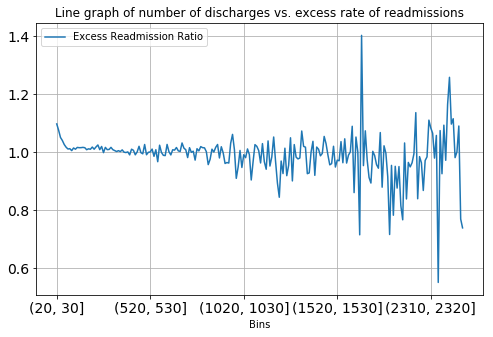

In [14]:
ax = mean_bucket_dsr.plot(use_index=True, y='Excess Readmission Ratio', figsize=(8,5), title='Line graph of number of discharges vs. excess rate of readmissions', 
                          fontsize=14, grid=True, xticks=(0,50,100,150,200))